In [1]:
%load_ext autoreload
%autoreload 2

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from skipper import observe

from ekfplot import plot as ek

import sys
sys.path.append('../scripts/')
import our_pointings
import sigjson_s2024a

ek.set_formatting()

In [4]:
halpha_pointings, oiii_pointings =  our_pointings.load_springfields()

In [18]:
copilot_fname = '/Users/kadofong/Downloads/merian0408/db_merian.fits'
tele_fname = '/Users/kadofong/Downloads/merian0408/tele20240408.csv'

coo_o = observe.CopilotOutput ( copilot_fname, oiii_pointings, skySB_0=22.1 )
coo_h = observe.CopilotOutput ( copilot_fname, halpha_pointings )

In [19]:
fields = oiii_pointings['object'].str.extract(r'(.*?(?=_))')[0]

In [20]:
obsdates = sigjson_s2024a.obsdates
obsfilters = sigjson_s2024a.obsfilters

(array([126., 142., 212., 170., 106.,  65.,  37.,  22.,  19.,   3.]),
 array([5.56995515e-02, 1.85270098e+02, 3.70484497e+02, 5.55698896e+02,
        7.40913295e+02, 9.26127694e+02, 1.11134209e+03, 1.29655649e+03,
        1.48177089e+03, 1.66698529e+03, 1.85219969e+03]),
 <BarContainer object of 10 artists>)

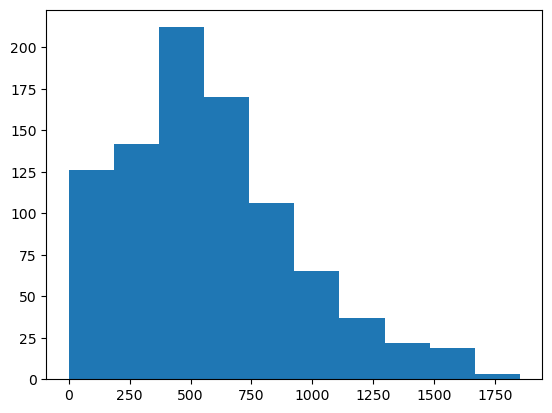

In [23]:
plt.hist(coo_o.merian_sidecar['t_eff'])

In [31]:
reobs = coo_o.flag_for_reobservation(300.)

In [40]:
x = coo_o.merian_sidecar.sort_values('t_eff')['object']

In [41]:
x.duplicated(

<bound method Series.duplicated of 63319      GAMA_J113357.74+014935.22_N540
63320      GAMA_J113507.77+014435.07_N540
62048      GAMA_J102338.37-005920.28_N540
61979      GAMA_J090945.03-004411.67_N540
61980      GAMA_J091054.86-004805.93_N540
                       ...               
61925      GAMA_J095214.88-010015.16_N540
61903    COSMOS_J100026.58+021448.51_N540
61955      GAMA_J090652.65-005141.42_N540
62119      GAMA_J095522.35-005120.79_N540
61954      GAMA_J090542.12-004915.96_N540
Name: object, Length: 902, dtype: object>

In [43]:
sorter = coo_o.merian_sidecar.sort_values('t_eff')['object'].duplicated(keep=False)

In [50]:
completed = coo_o.identify_completed_pointings(300.)

In [ ]:
s

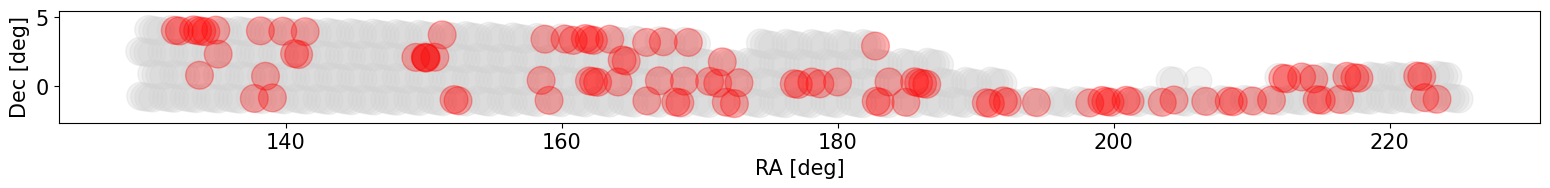

In [81]:
fig = plt.figure(figsize=(22,2))
ax = plt.subplot(111)
ax.set_aspect('equal')

t_eff_min = 400.
reobs = completed['t_eff'] < t_eff_min
clist = ['lightgrey','r']

fov_radius = (3.18/np.pi)**0.5

plt.scatter(
    completed['racenter'],
    completed['deccenter'],
    s=1,
    alpha=0.0
)
for idx,mask in enumerate([~reobs,reobs]):
    for name,row in completed[mask].iterrows():
        circ = patches.Circle(
            (row['racenter'],row['deccenter']),
            fov_radius,
            color=clist[idx],
            alpha=0.3
        )
        ax.add_patch(circ)

ax.set_xlabel(ek.common_labels['ra'])
ax.set_ylabel(ek.common_labels['dec'])
plt.tight_layout ()
plt.savefig('/Users/kadofong/Desktop/reobs.png')

In [83]:
completed[reobs].to_csv('/Users/kadofong/Desktop/reobs_at_400.csv')

In [87]:
completed.columns


Index(['filename', 'extension', 'expnum', 'exptime', 'mjd_obs', 'airmass',
       'racenter', 'deccenter', 'rabore', 'decbore', 'band', 'ebv',
       'zeropoint', 'transparency', 'seeing', 'sky', 'expfactor', 'camera',
       'dx', 'dy', 'nmatched', 'md5sum', 'bad_pixcnt', 'readtime', 'obstype',
       'object', 'tileid', 'passnumber', 'tileebv', 'affine_x0', 'affine_y0',
       'affine_dx', 'affine_dxx', 'affine_dxy', 'affine_dy', 'affine_dyx',
       'affine_dyy', 't_eff'],
      dtype='object')

In [97]:
completed = coo_h.identify_completed_pointings(200.)

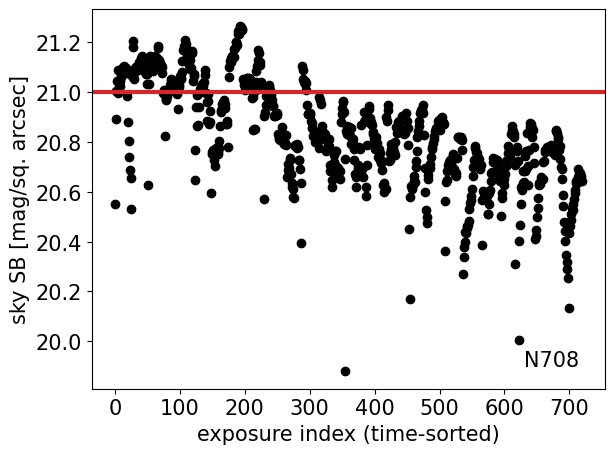

In [99]:
plt.scatter(
    np.arange(len(completed['mjd_obs'])),
    completed['sky'],
    color='k'
)
ek.text(0.95,0.05, 'N708')
plt.axhline(21.,color='tab:red', lw=3)
plt.xlabel('exposure index (time-sorted)')
plt.ylabel(r'sky SB [mag/sq. arcsec]')
plt.tight_layout()
plt.savefig('/Users/kadofong/Desktop/sb_v_time.png')